In [58]:
from scipy.io import wavfile

samp_freq, sound = wavfile.read('notebooks/plots/frequency_domain/piano_et_clarinet.wav')

<ipython-input-58-f9528fdc7344>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samp_freq, sound = wavfile.read('notebooks/plots/frequency_domain/piano_et_clarinet.wav')


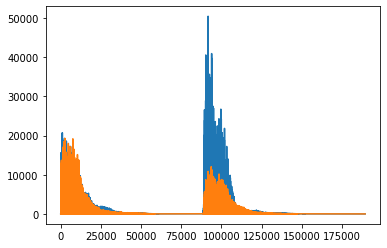

In [22]:
import matplotlib.pyplot as plt
import numpy as np
np.fft.fft(sound[0])
plt.plot(np.abs(np.fft.fft(sound)))

In [92]:
from scipy.signal import hilbert

piano = sound[0:20000,0]
clarinet = sound[89000:109000,0]

In [93]:
piano_fft_spectrum = np.fft.rfft(piano)
piano_freq = np.fft.rfftfreq(piano.size, d=1./samp_freq)
clarinet_fft_spectrum = np.fft.rfft(clarinet)
clarinet_freq = np.fft.rfftfreq(clarinet.size, d=1./samp_freq)

In [97]:
# Color palette
pink = "#FF00C0"
purple = "#9401FF"
dark_blue = "#4900FF"
blue = "#01B9FF"
cyan = "#00FFF9"

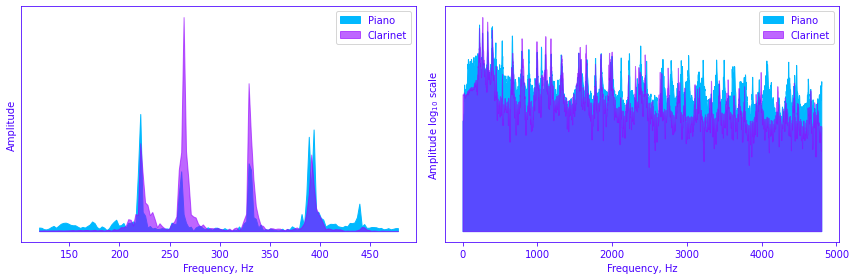

In [140]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
first = 100

ax[0].fill_between(piano_freq[50:200], (np.abs(piano_fft_spectrum)[50:200]), color=blue)
ax[0].fill_between(clarinet_freq[50:200], (np.abs(clarinet_fft_spectrum)[50:200]), color=purple, alpha=0.6)
ax[1].fill_between(piano_freq[:2000], np.log10(np.abs(piano_fft_spectrum)[:2000]), color=blue)
ax[1].fill_between(clarinet_freq[:2000], np.log10(np.abs(clarinet_fft_spectrum)[:2000]), color=purple, alpha=0.6)
ax[0].set_xlabel("Frequency, Hz", color=dark_blue)
ax[0].set_ylabel("Amplitude", color=dark_blue)
ax[0].set_yticks([])
ax[1].set_xlabel("Frequency, Hz", color=dark_blue)
ax[1].set_ylabel("Amplitude log$_{10}$ scale", color=dark_blue)
ax[1].set_yticks([])
l0=ax[0].legend(["Piano", "Clarinet"])
l1=ax[1].legend(["Piano", "Clarinet"])
for text in l0.get_texts():
    text.set_color(dark_blue)
for text in l1.get_texts():
    text.set_color(dark_blue)
for ax in fig.axes:
    ax.tick_params(axis='x', colors=dark_blue)
    for spine in ax.spines.values():
        spine.set_edgecolor(dark_blue)

fig.tight_layout()
